# Objectives {.unnumbered}

By the end of this lab, you will:
1. Load and analyze the **Lightcast dataset** in **Spark DataFrame**.
2. Create **five easy and three medium-complexity visualizations** using **Plotly**.
3. Explore **salary distributions, employment trends, and job postings**.
4. Analyze **skills in relation to NAICS/SOC/ONET codes and salaries**.
5. Customize **colors, fonts, and styles** in all visualizations (**default themes result in a 2.5-point deduction**).
6. Follow **best practices for reporting on data communication**.

# Step 1: Load the Dataset {.unnumbered}


In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


# Initialize Spark Session
spark = SparkSession.builder.appName("LightcastData").getOrCreate()

# Load Data
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("./data/lightcast_job_postings.csv")

# Show Schema and Sample Data
df.printSchema()
df.show(5)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/02 22:43:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/04/02 22:43:21 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


root
 |-- ID: string (nullable = true)
 |-- LAST_UPDATED_DATE: string (nullable = true)
 |-- LAST_UPDATED_TIMESTAMP: timestamp (nullable = true)
 |-- DUPLICATES: integer (nullable = true)
 |-- POSTED: string (nullable = true)
 |-- EXPIRED: string (nullable = true)
 |-- DURATION: integer (nullable = true)
 |-- SOURCE_TYPES: string (nullable = true)
 |-- SOURCES: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- ACTIVE_URLS: string (nullable = true)
 |-- ACTIVE_SOURCES_INFO: string (nullable = true)
 |-- TITLE_RAW: string (nullable = true)
 |-- BODY: string (nullable = true)
 |-- MODELED_EXPIRED: string (nullable = true)
 |-- MODELED_DURATION: integer (nullable = true)
 |-- COMPANY: integer (nullable = true)
 |-- COMPANY_NAME: string (nullable = true)
 |-- COMPANY_RAW: string (nullable = true)
 |-- COMPANY_IS_STAFFING: boolean (nullable = true)
 |-- EDUCATION_LEVELS: string (nullable = true)
 |-- EDUCATION_LEVELS_NAME: string (nullable = true)
 |-- MIN_EDULEVELS: integer (

25/04/02 22:43:25 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+-----------------+----------------------+----------+--------+---------+--------+--------------------+--------------------+--------------------+-----------+-------------------+--------------------+--------------------+---------------+----------------+--------+--------------------+-----------+-------------------+----------------+---------------------+-------------+-------------------+-------------+------------------+---------------+--------------------+--------------------+--------------------+-------------+------+-----------+----------------+-------------------+---------+-----------+--------------------+--------------------+-------------+------+--------------+-----+--------------------+-----+----------+---------------+--------------------+---------------+--------------------+------------+--------------------+------------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+------

# Salary Distribution by Employment Type
- Identify salary trends across different employment types.
- **Filter the dataset**
  - Remove records where **salary is missing or zero**.
- **Aggregate Data**
  - Group by **employment type** and compute salary distribution.
- **Visualize results**
  - Create a **box plot** where:
    - **X-axis** = `EMPLOYMENT_TYPE_NAME`
    - **Y-axis** = `SALARY_FROM`
  - Customize **colors, fonts, and styles** to avoid a **2.5-point deduction**.
- **Explanation:** Write two sentences about what the graph reveals.



In [2]:
# Your Code for 1st question here
pdf = df.select("EMPLOYMENT_TYPE_NAME", "SALARY").toPandas()
fig = px.box(pdf, x="EMPLOYMENT_TYPE_NAME", y="SALARY", title="Salary Distribution by Employment Type", color_discrete_sequence=["#636EFA"])
fig.update_layout(font_family="Arial", title_font_size=16)
fig.show()

# Salary Distribution by Industry
- Compare salary variations across industries.
- **Filter the dataset**
  - Keep records where **salary is greater than zero**.
- **Aggregate Data**
  - Group by **NAICS industry codes**.
- **Visualize results**
  - Create a **box plot** where:
    - **X-axis** = `NAICS2_NAME`
    - **Y-axis** = `SALARY_FROM`
  - Customize colors, fonts, and styles.
- **Explanation:** Write two sentences about what the graph reveals.

/tmp/ipykernel_2294/3854223855.py:7: DtypeWarning:

Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_2294/3854223855.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




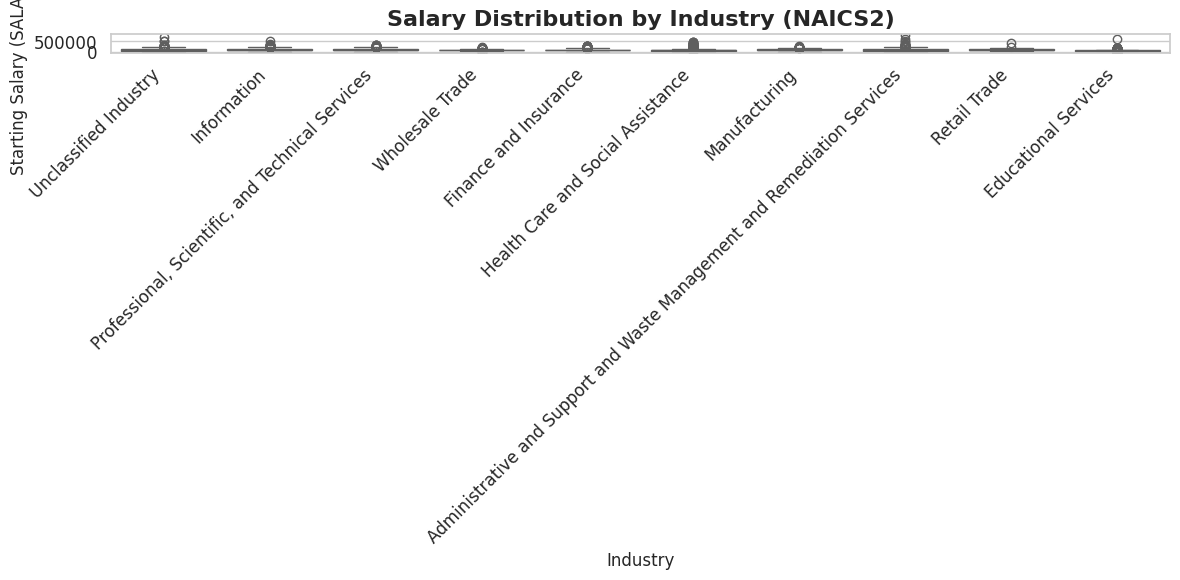

In [ ]:
# Your code for 2nd question here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

df = pd.read_csv("data/lightcast_job_postings.csv")

df_filtered = df[(df['SALARY_FROM'].notna()) & (df['SALARY_FROM'] > 0)]
df_filtered = df_filtered[df_filtered['NAICS2_NAME'].notna()]

top_industries = df_filtered['NAICS2_NAME'].value_counts().head(10).index
df_top = df_filtered[df_filtered['NAICS2_NAME'].isin(top_industries)]


plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    x="NAICS2_NAME",
    y="SALARY_FROM",
    data=df_top,
    palette="Set3"
)

plt.title("Salary Distribution by Industry (NAICS2)", fontsize=16, fontweight='bold')
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Starting Salary (SALARY_FROM)", fontsize=12)
plt.xticks(rotation=45, ha='right')

import os
os.makedirs("_output", exist_ok=True)
plt.tight_layout()
plt.savefig("_output/figure2.svg", format='svg')
plt.show()

# Job Posting Trends Over Time
- Analyze how job postings fluctuate over time.
- **Aggregate Data**
  - Count job postings per **posted date (`POSTED`)**.
- **Visualize results**
  - Create a **line chart** where:
    - **X-axis** = `POSTED`
    - **Y-axis** = `Number of Job Postings`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

/tmp/ipykernel_2294/1460555034.py:8: DtypeWarning:

Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.



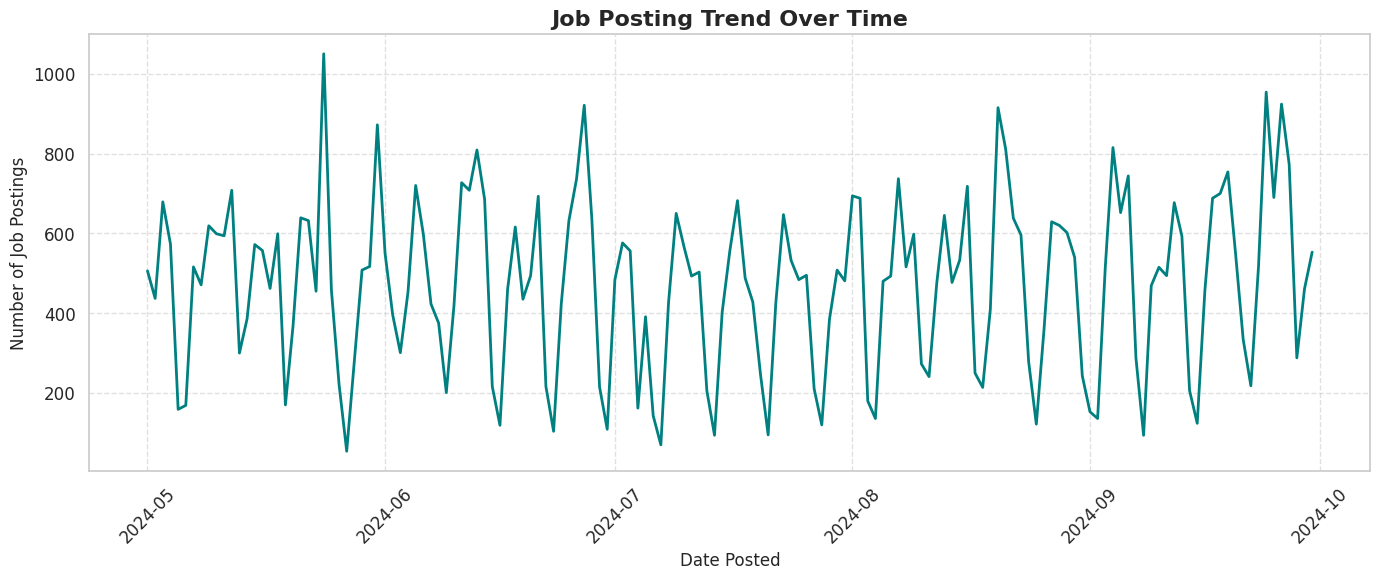

In [10]:
# Your code for 3rd question here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

df = pd.read_csv("data/lightcast_job_postings.csv")

df['POSTED'] = pd.to_datetime(df['POSTED'], errors='coerce')

df = df[df['POSTED'].notna()]

daily_postings = df.groupby('POSTED').size().reset_index(name='Job_Count')

plt.figure(figsize=(14, 6))
plt.plot(daily_postings['POSTED'], daily_postings['Job_Count'], color='teal', linewidth=2)

plt.title("Job Posting Trend Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date Posted", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("_output/figure3.svg", format='svg')
plt.show()

# Top 10 Job Titles by Count
- Identify the most frequently posted job titles.
- **Aggregate Data**
  - Count the occurrences of each **job title (`TITLE_NAME`)**.
  - Select the **top 10 most frequent titles**.
- **Visualize results**
  - Create a **bar chart** where:
    - **X-axis** = `TITLE_NAME`
    - **Y-axis** = `Job Count`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

/tmp/ipykernel_2294/2925404897.py:8: DtypeWarning:

Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.



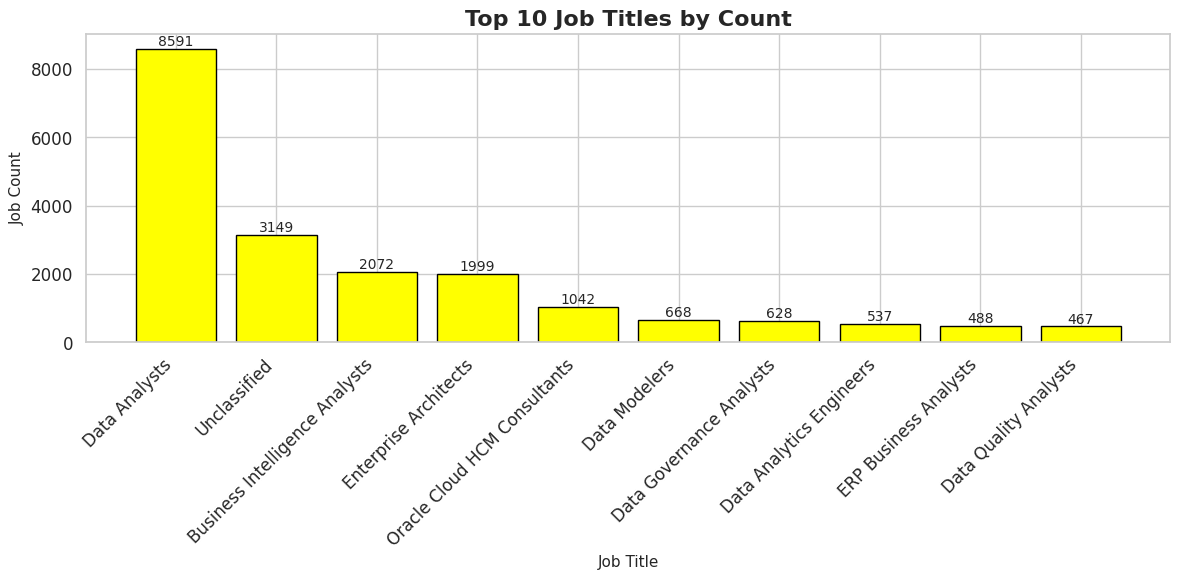

In [13]:
# Your code for 4th question here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

df = pd.read_csv("data/lightcast_job_postings.csv")

df = df[df['TITLE_NAME'].notna()]

top_titles = df['TITLE_NAME'].value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_titles.index, top_titles.values, color='yellow', edgecolor='black')

plt.title("Top 10 Job Titles by Count", fontsize=16, fontweight='bold')
plt.xlabel("Job Title", fontsize=11)
plt.ylabel("Job Count", fontsize=11)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, int(height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("_output/figure7.svg", format='svg')
plt.show()

# Remote vs On-Site Job Postings
- Compare the proportion of remote and on-site job postings.
- **Aggregate Data**
  - Count job postings by **remote type (`REMOTE_TYPE_NAME`)**.
- **Visualize results**
  - Create a **pie chart** where:
    - **Labels** = `REMOTE_TYPE_NAME`
    - **Values** = `Job Count`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

/tmp/ipykernel_2294/1120354006.py:5: DtypeWarning:

Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.



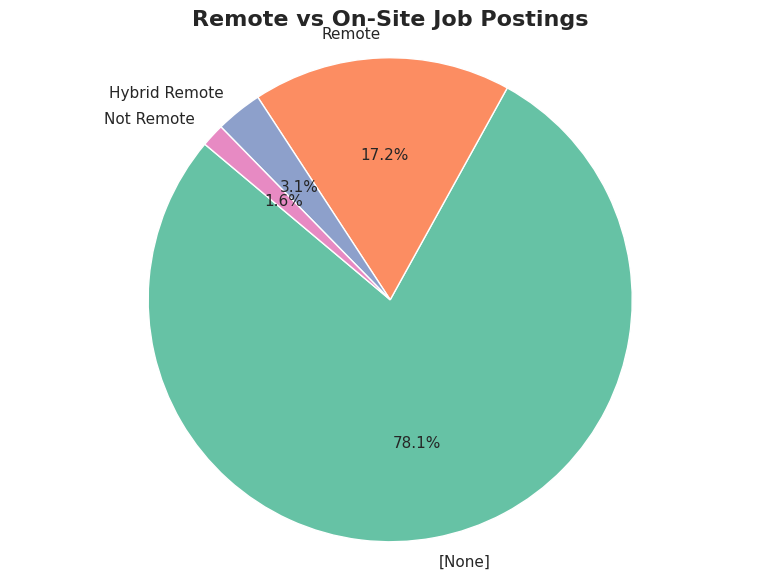

In [14]:
# Your code for 5th question here
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/lightcast_job_postings.csv")

df_remote = df[df['REMOTE_TYPE_NAME'].notna()]

remote_counts = df_remote['REMOTE_TYPE_NAME'].value_counts()

colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

plt.figure(figsize=(8, 6))
plt.pie(
    remote_counts.values,
    labels=remote_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 11}
)

plt.title("Remote vs On-Site Job Postings", fontsize=16, fontweight='bold')
plt.axis('equal') 

plt.tight_layout()
plt.savefig("_output/figure4.svg", format='svg')
plt.show()


# Skill Demand Analysis by Industry (Stacked Bar Chart)
- Identify which skills are most in demand in various industries.
- **Aggregate Data**
  - Extract **skills** from job postings.
  - Count occurrences of skills grouped by **NAICS industry codes**.
- **Visualize results**
  - Create a **stacked bar chart** where:
    - **X-axis** = `Industry`
    - **Y-axis** = `Skill Count`
    - **Color** = `Skill`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

/tmp/ipykernel_2294/3726926776.py:7: DtypeWarning:

Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_2294/3726926776.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2294/3726926776.py:37: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



<Figure size 1200x600 with 0 Axes>

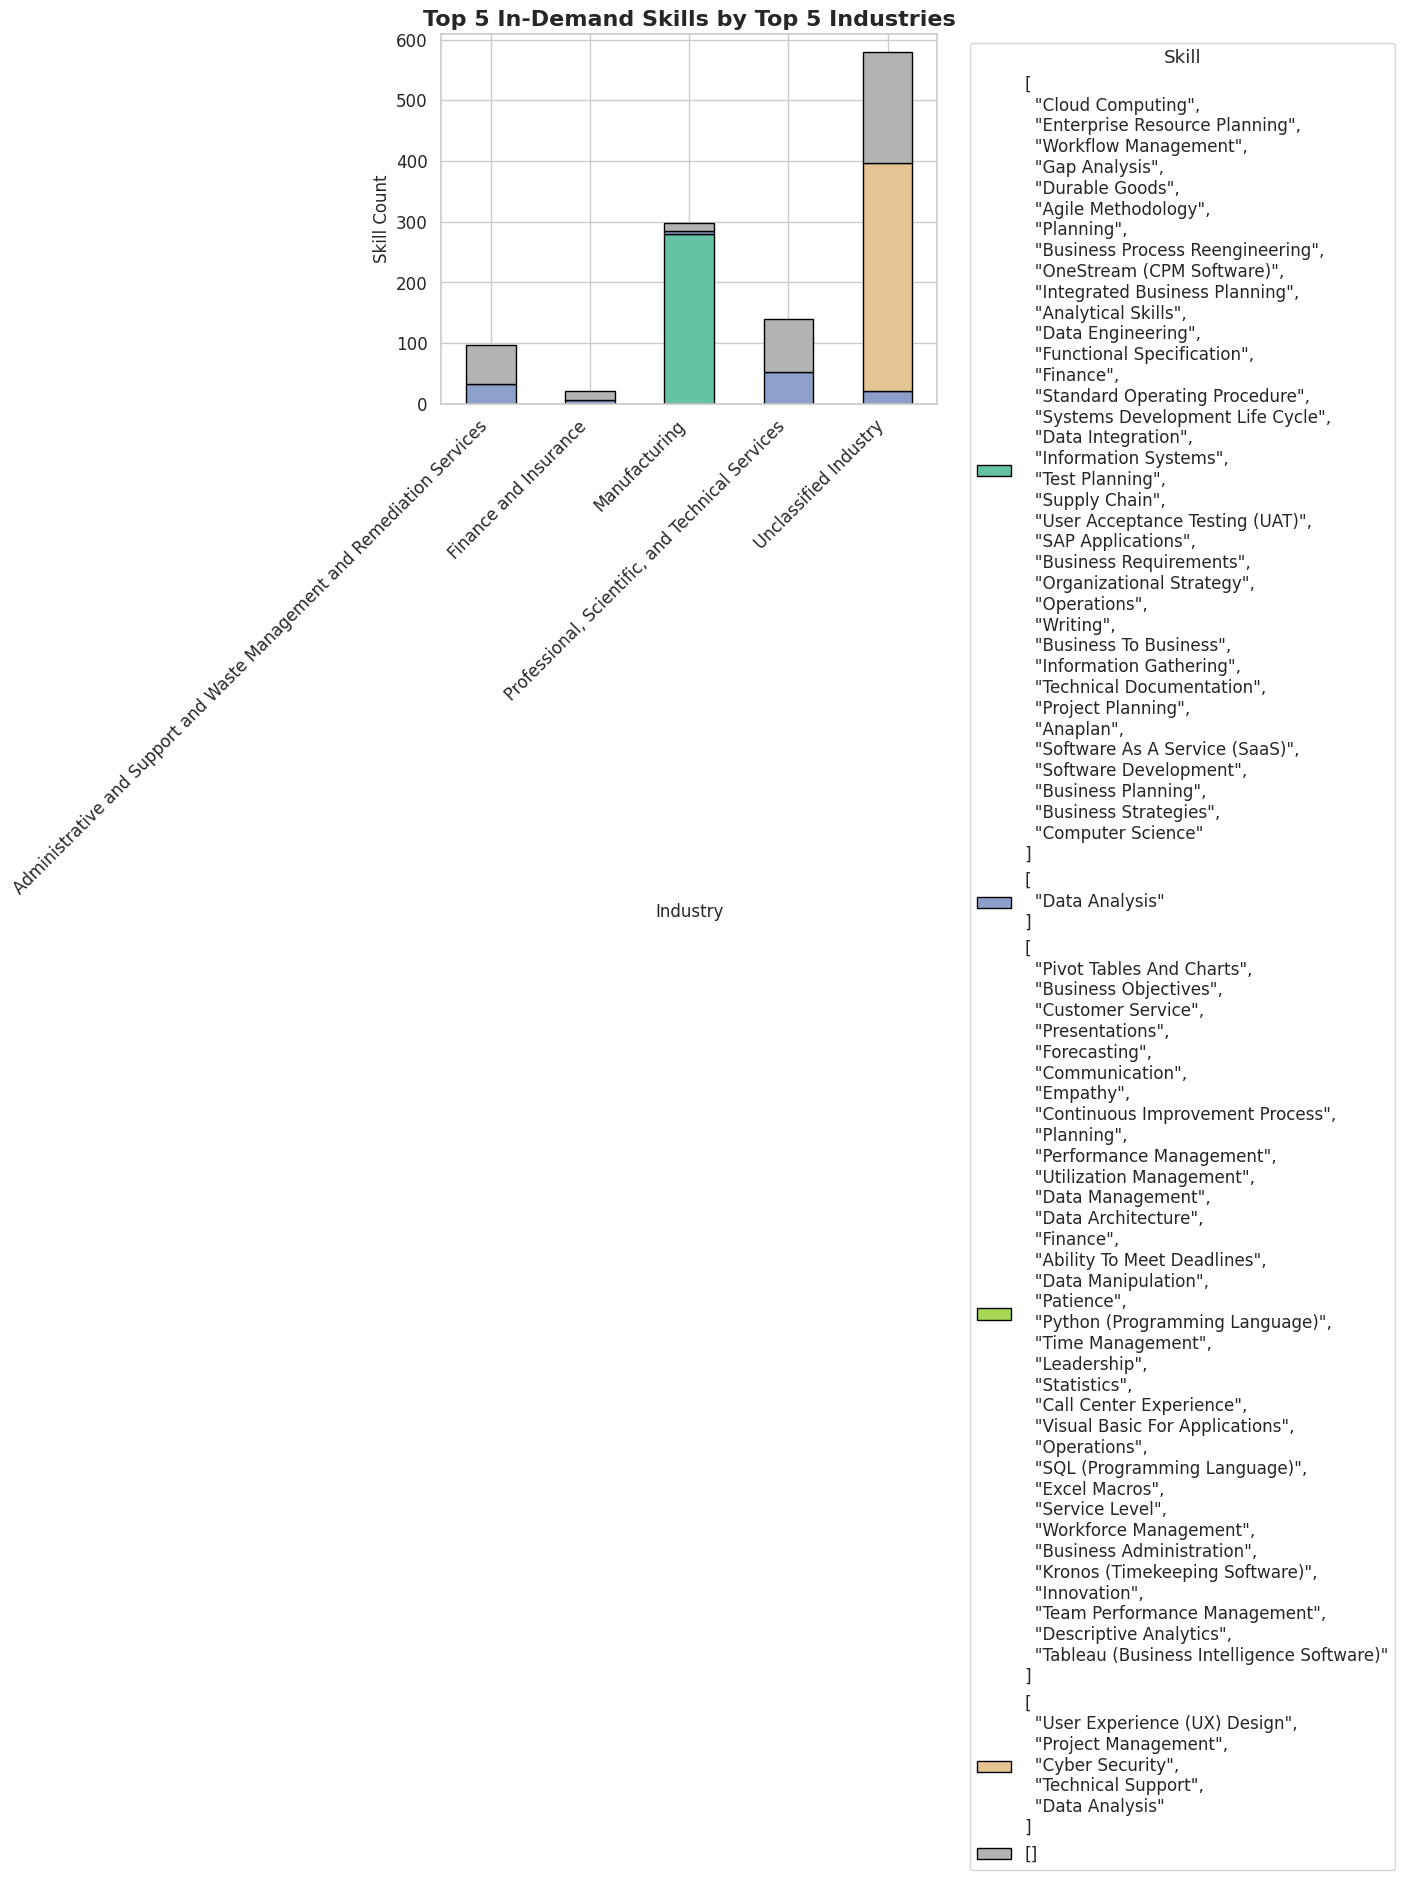

In [16]:
# Your code for 6th question here
import os
import pandas as pd
import matplotlib.pyplot as plt

os.makedirs("_output", exist_ok=True)
df = pd.read_csv("data/lightcast_job_postings.csv")

df_skills = df[df['SKILLS_NAME'].notna() & df['NAICS2_NAME'].notna()]


df_skills['SKILLS_LIST'] = df_skills['SKILLS_NAME'].str.split(';')
df_exploded = df_skills.explode('SKILLS_LIST')

df_exploded = df_exploded[df_exploded['SKILLS_LIST'].notna()]
df_exploded['SKILLS_LIST'] = df_exploded['SKILLS_LIST'].str.strip()


top_skills = df_exploded['SKILLS_LIST'].value_counts().head(5).index.tolist()
df_top_skills = df_exploded[df_exploded['SKILLS_LIST'].isin(top_skills)]

skill_counts = df_top_skills.groupby(['NAICS2_NAME', 'SKILLS_LIST']).size().unstack(fill_value=0)

top_industries = df['NAICS2_NAME'].value_counts().head(5).index.tolist()
skill_counts = skill_counts.loc[skill_counts.index.intersection(top_industries)]


plt.figure(figsize=(12, 6))
skill_counts.plot(kind='bar', stacked=True, colormap='Set2', edgecolor='black')

plt.title("Top 5 In-Demand Skills by Top 5 Industries", fontsize=16, fontweight='bold')
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Skill Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Skill", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("_output/figure5.svg", format='svg')
plt.show()



# Salary Analysis by ONET Occupation Type (Bubble Chart)
- Analyze how salaries differ across ONET occupation types.
- **Aggregate Data**
  - Compute **median salary** for each occupation in the **ONET taxonomy**.
- **Visualize results**
  - Create a **bubble chart** where:
    - **X-axis** = `ONET_NAME`
    - **Y-axis** = `Median Salary`
    - **Size** = Number of job postings
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

/tmp/ipykernel_2294/3409407125.py:10: DtypeWarning:

Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.



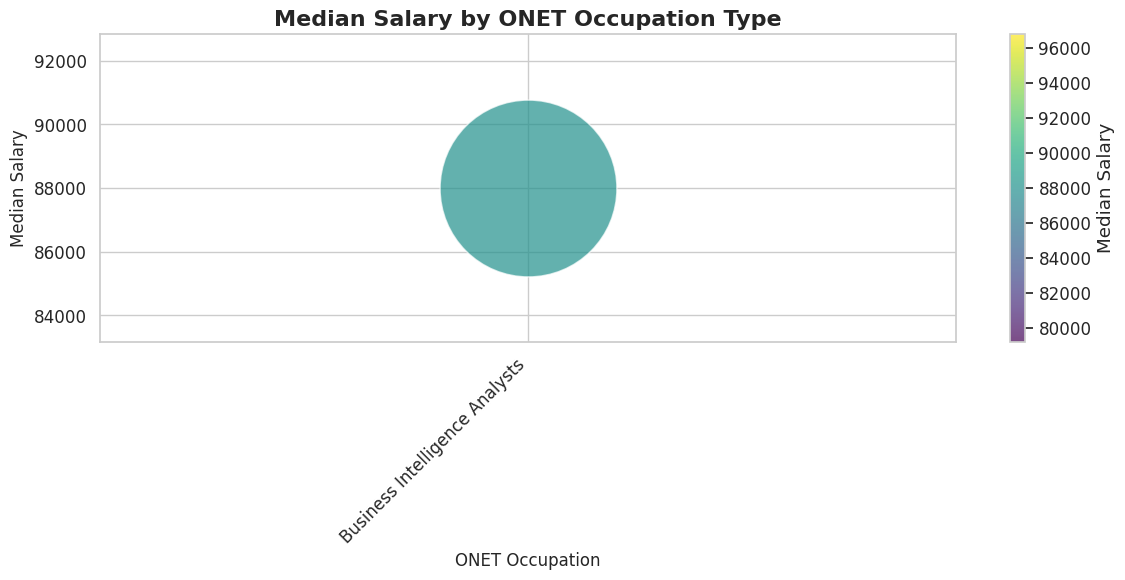

In [17]:
# Your code for 7th question here
import os
import pandas as pd
import matplotlib.pyplot as plt


os.makedirs("_output", exist_ok=True)


df = pd.read_csv("data/lightcast_job_postings.csv")


df_clean = df[df['SALARY_FROM'].notna() & df['SALARY_FROM'] > 0 & df['ONET_NAME'].notna()]


grouped = df_clean.groupby('ONET_NAME').agg(
    Median_Salary=('SALARY_FROM', 'median'),
    Job_Postings=('ONET_NAME', 'count')
).reset_index()

top_onet = grouped.sort_values(by='Job_Postings', ascending=False).head(15)


plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    top_onet['ONET_NAME'],
    top_onet['Median_Salary'],
    s=top_onet['Job_Postings'] * 0.5,  
    alpha=0.7,
    edgecolors='w',
    c=top_onet['Median_Salary'], cmap='viridis'
)

plt.title("Median Salary by ONET Occupation Type", fontsize=16, fontweight='bold')
plt.xlabel("ONET Occupation", fontsize=12)
plt.ylabel("Median Salary", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.colorbar(scatter, label='Median Salary')
plt.tight_layout()
plt.savefig("_output/figure_bubble_salary.svg", format='svg')
plt.show()


# Career Pathway Trends (Sankey Diagram)
- Visualize job transitions between different occupation levels.
- **Aggregate Data**
  - Identify career transitions between **SOC job classifications**.
- **Visualize results**
  - Create a **Sankey diagram** where:
    - **Source** = `SOC_2021_2_NAME`
    - **Target** = `SOC_2021_3_NAME`
    - **Value** = Number of transitions
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [ ]:
# Your code for 8th question here

import os
import pandas as pd
import plotly.graph_objects as go


df = pd.read_csv("data/lightcast_job_postings.csv")


df_soc = df[df['SOC_2021_2_NAME'].notna() & df['SOC_2021_3_NAME'].notna()]


transition_df = df_soc.groupby(['SOC_2021_2_NAME', 'SOC_2021_3_NAME']).size().reset_index(name='count')


all_nodes = list(pd.unique(transition_df['SOC_2021_2_NAME'].tolist() + transition_df['SOC_2021_3_NAME'].tolist()))
node_map = {name: i for i, name in enumerate(all_nodes)}


source_ids = transition_df['SOC_2021_2_NAME'].map(node_map)
target_ids = transition_df['SOC_2021_3_NAME'].map(node_map)
values = transition_df['count']


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color="lightblue"
    ),
    link=dict(
        source=source_ids,
        target=target_ids,
        value=values
    )
)])

fig.update_layout(title_text="Career Pathway Trends by SOC Levels", font_size=10)
fig.write_html("_output/sankey_soc_pathways.html")  # 保存为 HTML 文件
fig.show()


/tmp/ipykernel_2294/4085059054.py:8: DtypeWarning:

Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_2294/4085059054.py:17: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

